# FALL 2021 Data Science Intern Challenge
### Author: ZIHAN(Liz) ZHU

## Shopify Sneakers Transactions Analysis
On Shopify, we have exactly 100 sneaker shops, and each of these shops sells only one model of shoe. We want to do some analysis of the average order value (AOV). When we look at orders data over a 30 day window, we naively calculate an AOV of $3145.13. Given that we know these shops are selling sneakers, a relatively affordable item, something seems wrong with our analysis. 

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

* Load the Data set and show the descriptive statistics of the variables.
* Turn the **payment_method** into a dummy_variable

In [56]:
df = pd.read_csv('shopify.csv')

df.head()

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
0,1,53,746,224,2,cash,2017-03-13 12:36:56
1,2,92,925,90,1,cash,2017-03-03 17:38:52
2,3,44,861,144,1,cash,2017-03-14 4:23:56
3,4,18,935,156,1,credit_card,2017-03-26 12:43:37
4,5,18,883,156,1,credit_card,2017-03-01 4:35:11


To explore the cause of high AOV, I made a joint scatter plot of **total_items** and **order_amount**.

Text(0, 0.5, 'Order Amount')

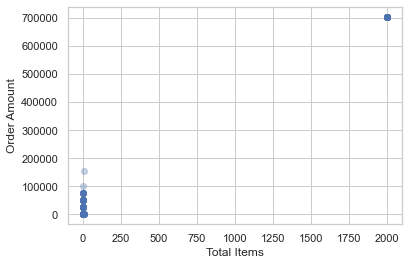

In [57]:
total_items = df.total_items.values
order_amount = df.order_amount.values

#Make the scatter plot
plt.scatter(total_items, order_amount, alpha= 0.3)
plt.xlabel('Total Items')
plt.ylabel('Order Amount')


total_items
1       1830
2       1832
3        941
4        293
5         77
6          9
8          1
2000      17
dtype: int64
C:\Users\Lycheche\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_items', ylabel='count'>

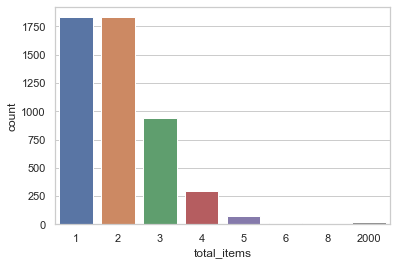

In [58]:
df_group = df.groupby(['total_items']).size()
print(df_group)


sns.countplot(df['total_items'],label="Count")

As we can roughly see from the scatter, there exists some outliers around 2000. This implies there is something unusual when we inspect the sizes of the orders. For further confirmation, a table of transaction size and coutplot is generated. 

From the table and plot, it is clear that all of the order sizes are below or equal to 8, except there are 17 orders with size 2000. It is likely that these excessively large transactions lead to an unexpected high AOV.

In order to prove my point, these 14 records are extracted and analyzed .

In [59]:
ex_df = df[df['total_items'] == 2000]
ex_df = ex_df.sort_values(by= ['created_at'])
ex_df

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
520,521,42,607,704000,2000,credit_card,2017-03-02 4:00:00
4646,4647,42,607,704000,2000,credit_card,2017-03-02 4:00:00
60,61,42,607,704000,2000,credit_card,2017-03-04 4:00:00
15,16,42,607,704000,2000,credit_card,2017-03-07 4:00:00
2297,2298,42,607,704000,2000,credit_card,2017-03-07 4:00:00
1436,1437,42,607,704000,2000,credit_card,2017-03-11 4:00:00
2153,2154,42,607,704000,2000,credit_card,2017-03-12 4:00:00
1362,1363,42,607,704000,2000,credit_card,2017-03-15 4:00:00
1602,1603,42,607,704000,2000,credit_card,2017-03-17 4:00:00
1562,1563,42,607,704000,2000,credit_card,2017-03-19 4:00:00


In [61]:
num_debit = len(ex_df[ex_df['payment_method'] == 'debit'])
num_cash = len(ex_df[ex_df['payment_method'] == 'cash'])
num_credit = len(ex_df[ex_df['payment_method'] == 'credit_card'])

print('There are ', num_cash,'orders are pain by cash')
print('There are ', num_debit,'orders are pain by debit card')
print('There are ', num_credit,'orders are pain by crdit card')

There are  0 orders are pain by cash
There are  0 orders are pain by debit card
There are  17 orders are pain by crdit card


After extracing 17 records, it is curious that all these transactions share the same user_id(607) and the same shop_id(42). Moreover, all these suspicious transactions are made by credit cards and at exactly 4 a.m.

Either they are credit frauds, or there exists a duplicate-entries problem in this dataset

total_items
1    1830
2    1832
3     941
4     293
5      77
6       9
8       1
dtype: int64
C:\Users\Lycheche\AppData\Local\Programs\Python\Python39\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='total_items', ylabel='count'>

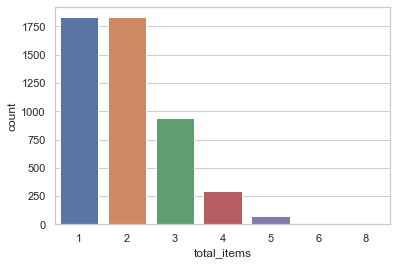

In [65]:
df_new = df.drop(df[df['total_items']==2000].index)

df_group_new = df_new.groupby(['total_items']).size()
print(df_group_new)
sns.countplot(df_new['total_items'],label="Count")

In [68]:
df_new.describe()

,order_id,shop_id,user_id,order_amount,total_items
count,4983.000000,4983.000000,4983.000000,4983.000000,4983.00000
mean,2501.060405,50.106362,849.918322,754.091913,1.99398
std,1443.090253,29.051718,86.800308,5314.092293,0.98318
min,1.000000,1.000000,700.000000,90.000000,1.00000
25%,1250.500000,24.000000,776.000000,163.000000,1.00000
50%,2502.000000,50.000000,850.000000,284.000000,2.00000
75%,3750.500000,75.000000,925.000000,390.000000,3.00000
max,5000.000000,100.000000,999.000000,154350.000000,8.00000


In [78]:
AOV_new = df_new['order_amount'].mean()
print('After drop the transaction with exsessive size, we now have a new calculated AOV which is $', round(AOV_new, ndigits=2))

MOV = df_new['order_amount'].median()
print('The median order value is $', round(MOV, ndigits=2))

After drop the transaction with exsessive size, we now have a new calculated AOV which is $ 754.09
The median order value is $ 284.0


Text(0, 0.5, 'Order Amount')

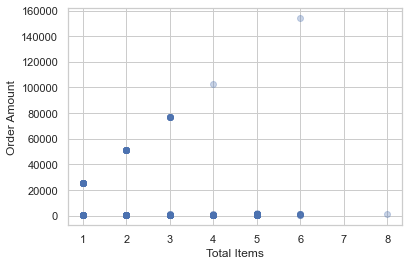

In [70]:
total_items_new = df_new.total_items.values
order_amount_new = df_new.order_amount.values

#Make the scatter plot
plt.scatter(total_items_new, order_amount_new, alpha= 0.3)
plt.xlabel('Total Items')
plt.ylabel('Order Amount')

As we can see from the new AOV, it is still far away from affordable. The new scatter plot shows that there are some orders with reasonable size that have order amount above $20,000.

In [73]:
df_con2 = df_new[df_new['order_amount'] > 20000]
df_con2

,order_id,shop_id,user_id,order_amount,total_items,payment_method,created_at
160,161,78,990,25725,1,credit_card,2017-03-12 5:56:57
490,491,78,936,51450,2,debit,2017-03-26 17:08:19
493,494,78,983,51450,2,cash,2017-03-16 21:39:35
511,512,78,967,51450,2,cash,2017-03-09 7:23:14
617,618,78,760,51450,2,cash,2017-03-18 11:18:42
691,692,78,878,154350,6,debit,2017-03-27 22:51:43
1056,1057,78,800,25725,1,debit,2017-03-15 10:16:45
1193,1194,78,944,25725,1,debit,2017-03-16 16:38:26
1204,1205,78,970,25725,1,credit_card,2017-03-17 22:32:21
1259,1260,78,775,77175,3,credit_card,2017-03-27 9:27:20


All these transactions are related to a common shop_id(78), but with different user_id's at different time.
This could be reasonable since there may be some seankers with high unit prices due to the uniqueness of certain styles.

### Summary:

**a.** There are two main reasons lead to the high value of AOV. The first is there are 17 identical large-sized transaction records pulling up AOV. While the other reason seems more reasonable, serval transactions purchasing high-unit-price items are also pulling up the AOV.

To solve this question, I re-calculate the AOV while leaving 17 suspicious transactions. 

**b.** Since the dataset has some outliers we could choose the median order value instead of AOV to filter out the values that are skewing the resuklts. 

**c.** Now the AOV is 754.09 and the meadian order value is 284

## SQL Question Answers
**a.**

SELECT COUNT(*)

FROM Orders AS o, Shippers AS s

WHERE o.ShipperId = s.ShipperId AND ShipperName = "Speedy Express";

**There are 54 orders were shipped bu Speedy Express**

**b.** 

SELECT c.CustomerName, COUNT(*) AS Count

FROM Orders AS o, Customers AS c

WHERE o.CustomerID = c.CustomerID

GROUP BY o.CustomerID

ORDER BY Count DESC

LIMIT 1;

**The last name of the employee with the most orders is Handel**

**c.**

SELECT p.ProductID, p.ProductName, SUM(Quantity) AS TotalQuantity

FROM Orders AS o, OrderDetails AS od, Customers AS c, Products AS p

WHERE c.Country = "Germany" AND od.OrderID = o.OrderID AND od.ProductID = p.ProductID AND 

c.CustomerID = o.CustomerID
GROUP BY p.ProductID

ORDER BY TotalQuantity DESC

LIMIT 1;

** Boston crab meat  was ordered the most by customers in Germany.**